# Quantum Teleportation

TODO: Describe

In [1]:
# Qiskit demo
from math import sqrt, pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex

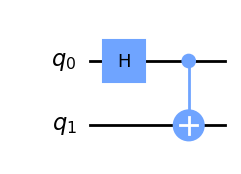

In [2]:
# Entangle 2 qubits

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [3]:
sim = Aer.get_backend('aer_simulator')  
qc.save_statevector(label='bell_state')   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run

result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.data()['bell_state']
array_to_latex(out_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

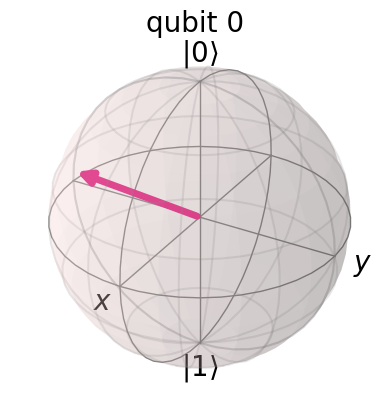

In [4]:
# Generate a random state
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

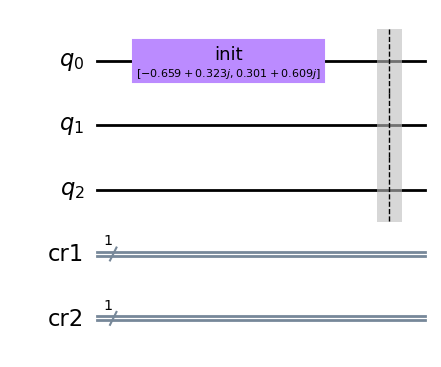

In [5]:
from qiskit.extensions import Initialize

## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
cr1 = ClassicalRegister(1, name="cr1") # and 2 classical registers
cr2 = ClassicalRegister(1, name="cr2")
tc = QuantumCircuit(qr, cr1, cr2)

# Initialize the first bit to the state vector
init_gate = Initialize(psi)
init_gate.label = "init"
tc.append(init_gate, [0])
tc.barrier()
tc.draw(output='mpl')

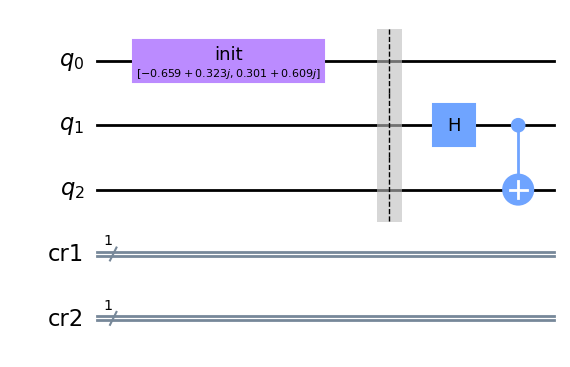

In [6]:
## STEP 1
# Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
tc.h(1)
tc.cx(1,2)
# And view the circuit so far:
tc.draw(output='mpl')

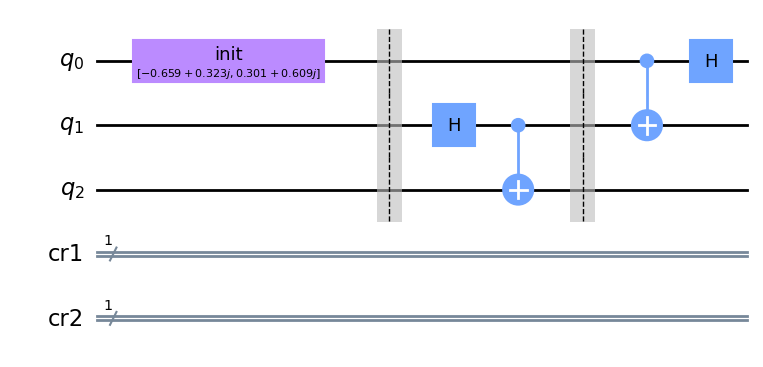

In [7]:
## STEP 2
tc.barrier() # Use barrier to separate steps
# Alice applies a CNOT to her qubit and then a Hadamard gate
tc.cx(0, 1)
tc.h(0)
tc.draw(output='mpl')

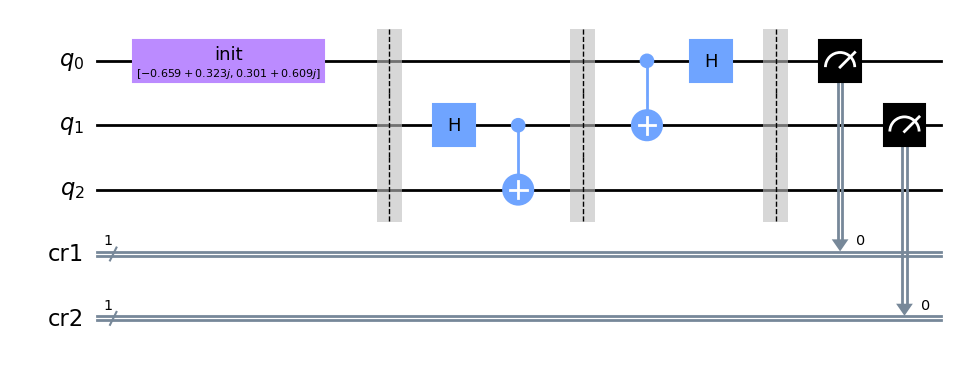

In [8]:
# Step 3
# Alice measures her qubits
tc.barrier()
tc.measure(0,0)
tc.measure(1,1)
tc.draw(output='mpl')

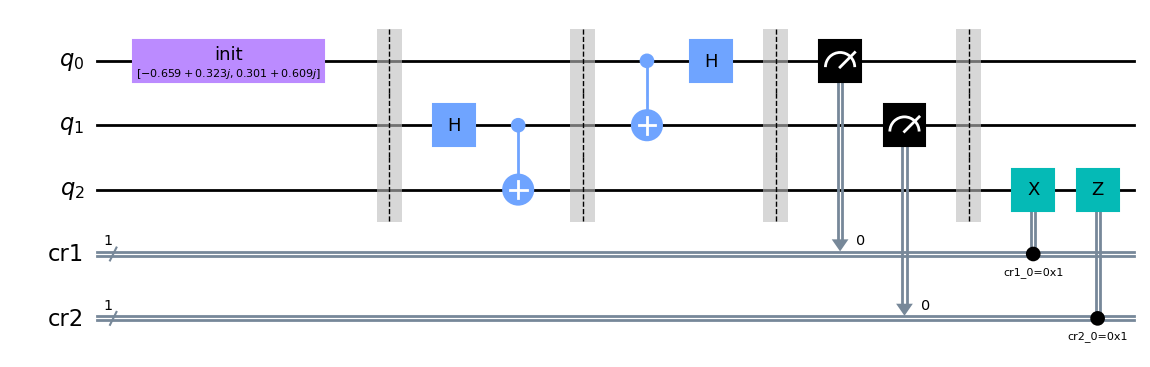

In [9]:
# Step 4
# Bob measures his entangled qbit based on the information received from Alice
tc.barrier()
# Here we use c_if to control our gates with a classical bit instead of a qubit
tc.x(2).c_if(0, 1) # Apply gates if the registers 
tc.z(2).c_if(1, 1) # are in the state '1'
tc.draw(output='mpl')

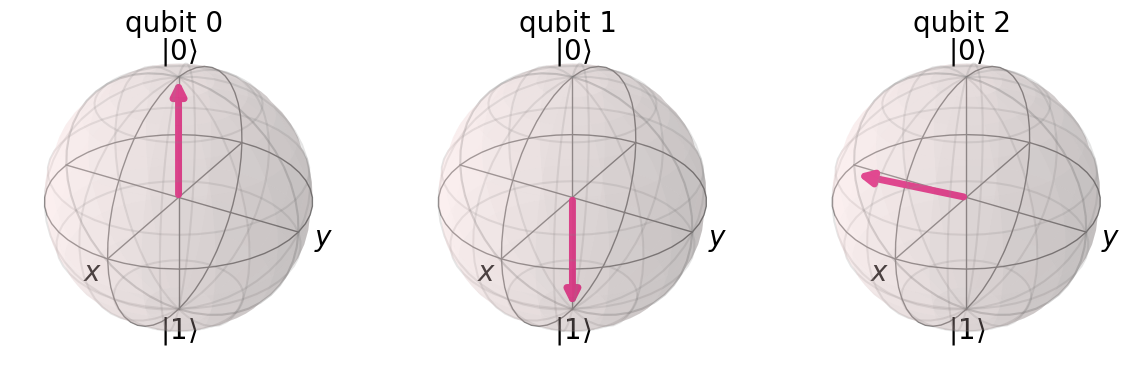

In [11]:
# Simulate

sim = Aer.get_backend('aer_simulator')
tc.save_statevector()
out_vector = sim.run(tc).result().get_statevector()
plot_bloch_multivector(out_vector)